# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [153]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [154]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000L, 784L)
label shape: (70000L,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

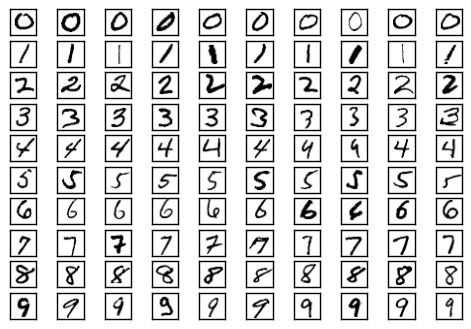

In [155]:
#def P1(num_examples=10):

### STUDENT START ###

def grid_print (X,Y):

    # Here we will use for loops to find 10 examples of each digit class
    # Once identified we render a grayscale matrix for each example and place it into a gridded subplot

    # Set the initial grid position to 1
    gridcount = 1

    # The outer loop goes through an iteration for each digit 0-9, resetting the row count and the sample count in each iteration
    for d in range(0,10):

        rowcount = 0

        samplecount = 0

    # The inner loop looks though the label data in a sequential search to identify examples of the current digit
    # Once we have found 10 examples of the digit we break the inner loop

        for j in range (samplecount,len(Y)):

            if rowcount == 10:

                break

    # When an example digit is identified we reshape the feature array into a square matrix using np.reshape()
    # Then we render the matrix using plt.imshow() and place it into the appropriate position in our plot grid

            if Y[j] == d:

                grid = plt.subplot(10, 10, gridcount)

                plt.setp(grid, xticks=(), yticks=())

                plt.imshow(np.reshape(X[j],(28,28)),cmap='Greys')

    # The last step in the inner loop is to increment our row and  grid position counters
    # We also save the position of the example so we know where to start looking in the next loop to avoid repeat examples

                rowcount += 1

                gridcount += 1

                samplecount = j

    plt.show()

grid_print(X,Y)
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [156]:
##### def P2(k_values):

### STUDENT START ###

# Here we evaluate a KNN model for the various k values and print out the accuracy of each model on the dev set

for i in [9,7,5,3,1]:    
    
    knn_test = KNeighborsClassifier(n_neighbors = i) # Create the model for k = i

    knn_test.fit(mini_train_data, mini_train_labels) # Fit the model (no training needed for KNN)
    
    print 'k = ' + str(i) + ' accuracy: ' + str(knn_test.score(dev_data,dev_labels)) # Print accuracy of model on dev set

# The last loop leaves us with the KNN model for k = 1 that we want to print the classification report for    

knn_predictions = knn_test.predict(dev_data) # Create predictions

print 'k = 1 Classification Report:'

print(classification_report(dev_labels, knn_predictions)) # Print classification report

### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

k = 9 accuracy: 0.863
k = 7 accuracy: 0.865
k = 5 accuracy: 0.869
k = 3 accuracy: 0.878
k = 1 accuracy: 0.888
k = 1 Classification Report:
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



ANSWER: Looking at the classification report for the KNN model with k = 1 suggests that 9 is the most difficult digit because it has the lowest f1-score, which is a combination of both the precision and recall scores.  Depending on what exactly we mean by the "most difficult" digit we could also argue that 3 is the most difficult since it has a lower precision than 9.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [157]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

# Create an array with each of the training set sizes that we want to test
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]

# Create an empty array to store the accuracy results for each test
accuracies = []

# loop for each value in the training set sizes array
for i in train_sizes:
    
    # Get the start time of the test so that we can calculate run time
    start_time = time.clock()
    
    # Create a subset of the data equal to the desired training set size
    train_size_data, train_size_labels = X[:i], Y[:i]
    
    # Create the KNN model and fit it to the training data
    knn_test = KNeighborsClassifier(n_neighbors = 1)

    knn_test.fit(train_size_data, train_size_labels)
    
    # Score the model against the dev data
    print 'Training set size ' + str(i) + ' accuracy: ' + str(knn_test.score(dev_data,dev_labels))
    
    # Get the end time of the test so that we can calculate run time
    end_time = time.clock()
    
    # Subtract the start time from the end time to calculate run time
    print '\t time: ' + str(round((end_time-start_time),3)) + ' seconds'
    
    # The last step in the loop is to append the score result to our accuracy array
    accuracies.append(knn_test.score(dev_data,dev_labels))

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

Training set size 100 accuracy: 0.72
	 time: 0.125 seconds
Training set size 200 accuracy: 0.786
	 time: 0.239 seconds
Training set size 400 accuracy: 0.841
	 time: 0.464 seconds
Training set size 800 accuracy: 0.884
	 time: 0.954 seconds
Training set size 1600 accuracy: 0.902
	 time: 1.942 seconds
Training set size 3200 accuracy: 0.926
	 time: 3.946 seconds
Training set size 6400 accuracy: 0.937
	 time: 8.058 seconds
Training set size 12800 accuracy: 0.959
	 time: 16.116 seconds
Training set size 25000 accuracy: 0.97
	 time: 32.95 seconds


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

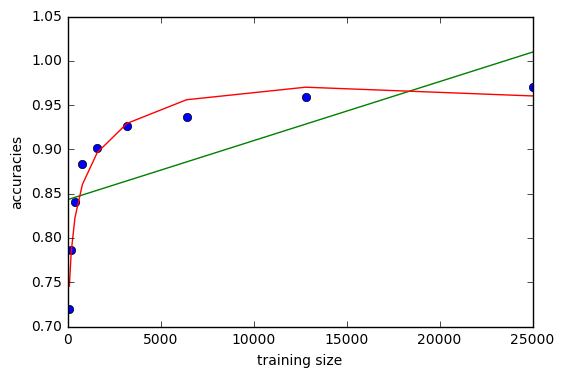

Predicted accuracy for training set size = 60,000: [ 1.24307226]
Predicted accuracy for training set size = 60,000, adding log transformation : [ 0.87288785]


In [158]:
#def P4():

### STUDENT START ###

# Reshaping our train_sizes array so that we can use in the linear regression model
train_sizes = np.array(train_sizes)

train_sizes = train_sizes.reshape(-1, 1)

# Creating the linear model and fitting it to our training set size and accuracy data
lr_model = LinearRegression(fit_intercept=True)

lr_model.fit(train_sizes, accuracies)

# Creating the approximate function output by our linear model
approx_function = lambda x: lr_model.intercept_ + lr_model.coef_[0]*x

# Creating a new array with an additional feature, the log transformation of training set size
train_sizes_2 = np.concatenate((train_sizes, np.log(train_sizes)),axis=1)

# Creating and fitting a linear regression model to our new 2 feature array
lr_model2 = LinearRegression(fit_intercept=True)

lr_model2.fit(train_sizes_2, accuracies)

# Creating the approximate function output by our new linear model including the log transformation
approx_function2 = lambda x: lr_model2.intercept_ + lr_model2.coef_[0]*x + lr_model2.coef_[1]*np.log(x)

# Plotting the actual data
plt.plot(train_sizes, accuracies, 'o')

# Plotting the approximate function output by the first linear model
plt.plot(train_sizes, approx_function(train_sizes))

# Plotting the approximate function output by the second linear model with log transforamtion
plt.plot(train_sizes, approx_function2(train_sizes))

plt.xlabel("training size")

plt.ylabel("accuracies")

plt.show()

# Printing the predicted accuracies for training set size = 60,000 for each of the linear models
n = 60000
        
nlog = (np.array((n,np.log(n)))).reshape(1, -1)

print 'Predicted accuracy for training set size = 60,000: ' + str(lr_model.predict(n))

print 'Predicted accuracy for training set size = 60,000, adding log transformation : ' + str(lr_model2.predict(nlog))

### STUDENT END ###

#P4()

ANSWER:The problem with using simple linear regression here is that the first degree model doesn't fit our data very well, as demonstrated in the green fit line.  It also doesn't take into account the fact that accuracy should have an upper bound at 100%.  We can make a model with much more reasonable predictions by adding a log transformation of our training set size variable.  We can see in the red fit line that the log transformation model clearly fits our data much better, and it gives us a prediction below 100% for the large training set size of 60,000.  The transformed model is still not perfect however, as we can see it starts to decline once the training size hits a certain point, which is not what we expect or see in the data.  It may be possible to correct for this by applying additional polynomial transformations.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


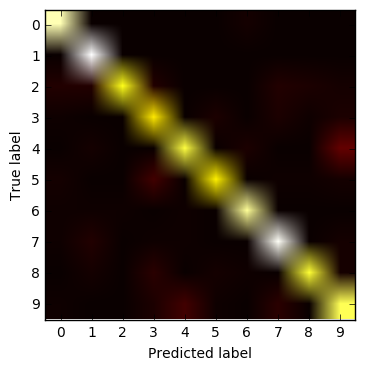

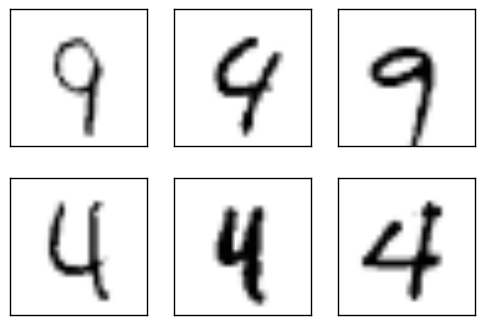

In [159]:
#def P5():

### STUDENT START ###

# Create the model for k = 1
knn_test = KNeighborsClassifier(n_neighbors = 1)

# Fit the model
knn_test.fit(mini_train_data, mini_train_labels)

# Create predictions from the model on the dev data    
knn_predictions = knn_test.predict(dev_data)

# Create the confusion matrix using the true dev labels vs the predicted ones
cm = confusion_matrix(dev_labels,knn_predictions) 

# Print the plain confusion matrix
print(cm)

# Create and print a heatmap representation of the confusion matrix
plt.xticks(range(10))

plt.yticks(range(10))  

plt.imshow(cm, cmap='hot')

plt.ylabel('True label')

plt.xlabel('Predicted label')

plt.show()

# loop through the dev labels to find 3 examples of 9s misidentified as 4s and 3 examples of 4s misidentified as 9s

example_count1 = 0

example_count2 = 0

grid_count1 = 1

grid_count2 = 1

for j in range(len(dev_labels)):
     
    # First we look for examples where the true label is 9 but 4 was predicted    
    if (dev_labels[j] == 9 and knn_predictions[j] == 4):
        
        # Once identified we add it to the plot and increment counters for the example case
        grid1 = plt.subplot(2, 3, grid_count1)
            
        plt.setp(grid1, xticks=(), yticks=())
        
        plt.imshow(np.reshape(dev_data[j],(28,28)),cmap='Greys')
        
        example_count1 += 1
        
        grid_count1 += 1
    
    # Then we look for examples where the true label is 4 but 9 was predicted
    if (dev_labels[j] == 4 and knn_predictions[j] == 9):
        
        grid2 = plt.subplot(2, 3, grid_count2+3)
            
        plt.setp(grid2, xticks=(), yticks=())
        
        plt.imshow(np.reshape(dev_data[j],(28,28)),cmap='Greys')
        
        example_count2 += 1
        
        grid_count2 += 1
    
    # Once we have found 3 examples of each case break off the loop
    if example_count1 == 3 and example_count2 == 3:
        break

### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Unblurred training examples:


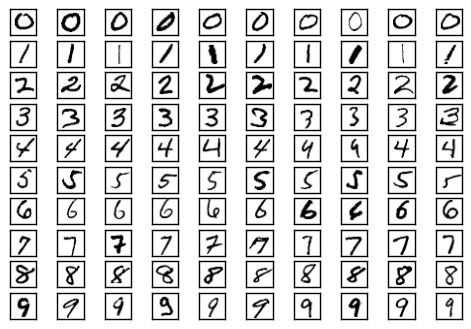

Blurred training examples:


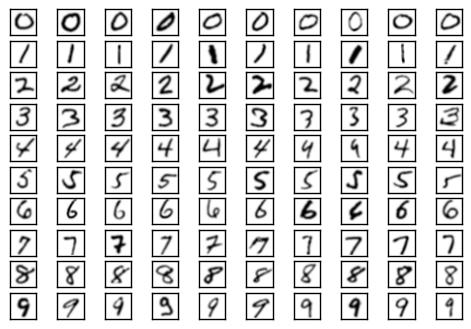

Original model with no preprocessing, accuracy: 0.888
Preprocessed the training data but not the dev data, accuracy: 0.911
Preprocessed the dev data but not the training data, accuracy: 0.873
Preprocessed both the dev data and the training data, accuracy: 0.901


In [160]:
#def P6():
    
### STUDENT START ###

# Creating a function to implement the simple Gaussian blur for a given sigma value
def gaussian_blur_filter(data,sigma):
    
    # First create the output blurred nparray in the shape of our input with all zeros initially
    blur_matrix = np.zeros(data.shape)
    
    # Create weights for each of the 8 neighboring pixels as well as the center pixel itself based on the
    # 2-dimensional gaussian function
    
    # The center pixel is weighted the highest as the distance is 0
    weight_0 = (1/(2*np.pi*(sigma**2)))*np.exp(0)
    
    # The 2 vertical and 2 horizontal neighboring pixels are the closest
    weight_2 = weight_4 = weight_5 = weight_7 = (1/(2*np.pi*(sigma**2)))*np.exp(-1/(2*(sigma**2)))
    
    # The 4 diagonal/corner pixels are equally the farthest from the center so get weighted less
    weight_1 = weight_3 = weight_6 = weight_8 = (1/(2*np.pi*(sigma**2)))*np.exp(-2/(2*(sigma**2)))

    # Each weight needs to be divided by the sum of all the weights so that they will add to 1
    weight_sum = weight_0+4*(weight_1)+4*(weight_2)

    weight_0 = weight_0/weight_sum

    weight_1 = weight_3 = weight_6 = weight_8 = weight_1/weight_sum

    weight_2 = weight_4 = weight_5 = weight_7 = weight_2/weight_sum
    
    # Loop through each example in the input
    for i in range(len(data)):
        
        # For each example we will loop through every pixel, starting after the first row and ending after the last
        # We skip the first and last row for simplicity since those pixels do not have 8 neighbors
        # The pixels on the vertical edges also don't have 8 neighbors but we will ignore them in this implementation for simplcity
        # This won't really impact our results since all of the pixels around the edges are zero values due to the centering 
        # and standardization of the data set
        for j in range(29,755):
            
            # Find the value of the center pixel and each of its 8 neighbors
            point_0 = data[i,j]

            point_1 = data[i,j-29]

            point_2 = data[i,j-28]

            point_3 = data[i,j-27]

            point_4 = data[i,j-1]

            point_5 = data[i,j+1]

            point_6 = data[i,j+27]

            point_7 = data[i,j+28]

            point_8 = data[i,j+29]
            
            # Calculate the new pixel value by multiplying each point by its weight and summing
            new_point_value = weight_0*point_0 + weight_1*point_1 + weight_2*point_2 + weight_3*point_3 + \
                weight_4*point_4 + weight_5*point_5 + weight_6*point_6 + weight_7*point_7 + weight_8*point_8
            
            # Add new pixel value to our blurred output array
            blur_matrix[i,j] = new_point_value
            
    return blur_matrix

# Create and print blurred versions of the train data and dev data using our new function
mini_train_data_blurred = gaussian_blur_filter(mini_train_data, 1.5)

dev_data_blurred = gaussian_blur_filter(dev_data, 1.5)

print 'Unblurred training examples:'

grid_print(mini_train_data, mini_train_labels)

print 'Blurred training examples:'

grid_print(mini_train_data_blurred, mini_train_labels)

# Create and fit a KNN model using the blurred training data
knn_test_1 = KNeighborsClassifier(n_neighbors = 1)

knn_test_1.fit(mini_train_data_blurred, mini_train_labels)

# Create and fit a KNN model using the standard training data
knn_test_2 = KNeighborsClassifier(n_neighbors = 1)

knn_test_2.fit(mini_train_data, mini_train_labels)

print 'Original model with no preprocessing, accuracy: ' + str(knn_test_2.score(dev_data,dev_labels))
    
print 'Preprocessed the training data but not the dev data, accuracy: ' + str(knn_test_1.score(dev_data,dev_labels))

print 'Preprocessed the dev data but not the training data, accuracy: ' + str(knn_test_2.score(dev_data_blurred,dev_labels))

print 'Preprocessed both the dev data and the training data, accuracy: ' + str(knn_test_1.score(dev_data_blurred,dev_labels))


#P6()

ANSWER:  It seems we get the best accuracy results when we preprocess the training data but not the dev data, slightly higher than when we preprocess both.  When we preprocess the dev data but not the training data the accuracy actually decreases compared to the original model.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [161]:
#def P7():

### STUDENT START ###

# Create and fit the Bernoulli Naive Bayes, binarizing the values with a threshold of .5
# Trying a few different thesholds doesn't seem to change our results too much
B_NB_model = BernoulliNB(binarize = .5)

B_NB_model.fit(mini_train_data, mini_train_labels)

# Score the Bernoulli Naive Bayes model against the dev data
print 'Accuracy of the Bernoulli Naive Bayes model: ' + str(B_NB_model.score(dev_data, dev_labels))

# Create a function to map the pixels to White, Grey, or Black for Multinomial Naive Bayes
def wgb_mapped(data):
    
    # Create mapped output array in the shape of the input 
    mapped_data = np.zeros(data.shape)
    
    # Loop though each input example
    for i in range(len(data)):
        
        # Loop through each pixel and set the mapped output for that pixel to 0,1, or 2 given threshold 0 and 0.5
        for j in range(len(data[i,:])):
        
            if data[i,j] >= 0.5:

                mapped_data[i,j] = 2

            elif data[i,j] > 0:

                mapped_data[i,j] = 1

            else:

                mapped_data[i,j] = 0
        
    
    return mapped_data

# Create WGB mapping for training and dev data
mapped_mini_train_data = wgb_mapped(mini_train_data)

mapped_dev_data = wgb_mapped(dev_data)

# Create and fit the Multinomial Naive Bayes model on the mapped training data
MN_NB_model = MultinomialNB()

MN_NB_model.fit(mapped_mini_train_data, mini_train_labels)

# Score the Multinomial Naive Bayes model on the mapped dev data
print 'Accuracy of the Multinomial Naive Bayes model: ' + str(MN_NB_model.score(mapped_dev_data, dev_labels))

# Create predictions for both the Bernoulli and Multinomial Naive Bayes models so we can compare the classification reports
B_NB_predictions = B_NB_model.predict(dev_data)

MN_NB_predictions = MN_NB_model.predict(dev_data)

print 'Bernoulli Naive Bayes Model Classification Report:'

print(classification_report(dev_labels, B_NB_predictions))

print 'Multinomial Naive Bayes Model Classification Report:'

print(classification_report(dev_labels, MN_NB_predictions))
    
### STUDENT END ###

#P7()

Accuracy of the Bernoulli Naive Bayes model: 0.815
Accuracy of the Multinomial Naive Bayes model: 0.795
Bernoulli Naive Bayes Model Classification Report:
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.80      0.94      0.87       105
        2.0       0.85      0.78      0.82       102
        3.0       0.63      0.74      0.68        86
        4.0       0.88      0.80      0.84       104
        5.0       0.77      0.63      0.69        91
        6.0       0.89      0.87      0.88        98
        7.0       0.90      0.82      0.86       113
        8.0       0.80      0.74      0.77        96
        9.0       0.72      0.81      0.76       106

avg / total       0.82      0.81      0.81      1000

Multinomial Naive Bayes Model Classification Report:
             precision    recall  f1-score   support

        0.0       0.90      0.96      0.93        99
        1.0       0.86      0.96      0.91    

ANSWER: The multi-class version of the Naive Bayes model seems to actually decrease the accuracy compared to the binary version.  This suggests that adding in the grey class ends up adding in more noise to the model than actual predictive power.  Another potential reason for the decreased accuracy is the underlying assumption of the Naive Bayes model that the features are independent of one another; when we add in both black and grey classes it seems intuitive that these features would not actually be independent.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [162]:
#def P8(alphas):

### STUDENT START ###

# Create the initial Bernoulli Naive Bayes model
B_NB_model = BernoulliNB(binarize = .5)

# Create the dictionary of parameter values for alpha to use in the grid search
parameters = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}

# Create and fit the grid search to test the Bernoulli Naive Bayes model for each parameter value
gridsearch = GridSearchCV(estimator = B_NB_model, param_grid = parameters)

gridsearch.fit(mini_train_data, mini_train_labels)

# Print out the best performing estimator with associated alpha value
print(gridsearch.best_estimator_)

# Print out the accuracy that the best parameter/model achieved
print(gridsearch.best_score_)

# Print out the score results for the case when the alpha parameter == 0
print(gridsearch.grid_scores_[0])

### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

BernoulliNB(alpha=0.01, binarize=0.5, class_prior=None, fit_prior=True)
0.821
mean: 0.09200, std: 0.00080, params: {'alpha': 0.0}


In [163]:
#print nb.best_params_

ANSWER:  The best value for alpha seems to be 0.01 as it gives us the highest accuracy score out of the grid search at 0.821.  When we look at the accuracy for alpha == 0 it is very low at 0.092.  This actually makes sense because with no laplacian smoothing in place our model is not able to classify any examples that it hasnt seen exact matches for.  Since our examples have a large amount of features/variation the model becomes very innacurate with no smoothing.

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [165]:
#def P9():

### STUDENT END ###

# Create and fit the Gaussian Naive Bayes model to the training data
G_NB_model = GaussianNB()

G_NB_model.fit(mini_train_data, mini_train_labels)

# Score the model against the dev data
print 'Accuracy of the Gaussian Naive Bayes model: ' + str(G_NB_model.score(dev_data, dev_labels))

# Adjust all of the model's computed sigma values by 0.01 and theta values by 0.15
G_NB_model.sigma_ += 0.01
G_NB_model.theta_ += 0.15

# Score the new model with adjusted sigmas against the dev data
print 'Accuracy of the Gaussian Naive Bayes model after smoothing sigma and theta: ' + str(G_NB_model.score(dev_data, dev_labels))

### STUDENT END ###

#gnb = P9()

Accuracy of the Gaussian Naive Bayes model: 0.621
Accuracy of the Gaussian Naive Bayes model after smoothing sigma and theta: 0.822


ANSWER:  When we initially fit the Gaussian Naive Bayes model we get a fairly low accuracy compared to our previous Naive Bayes models.  If we look at the theta and sigma values produced by fitting the model, we can see that a large number of our features have extremely small values that are essentially zero.  We get this effect occuring because of the way that Gaussian Naive Bayes is assuming a normal distribution for our feature values even though that is not actually the true distribution.  We can correct for this by adding a small number to all of the sigma and theta values after fitting the model, effectively acting as a smoothing parameter similar to alpha in the previous Naive Bayes models.  After adding this smoothing value of .01 for sigma (the same alpha we used previously) and 0.15 for theta, the accuracy of the Gaussian Naive Bayes model improves from 0.62 to 0.82, much closer to the other NB models.

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

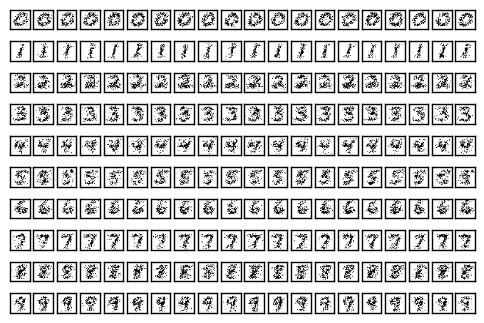

In [166]:
#def P10(num_examples):

### STUDENT START ###

# Create and fit a Bernoulli Naive Bayes model to the training data using the alpha value and binarization threshold from above
B_NB_model = BernoulliNB(alpha=.01, binarize = .5)

B_NB_model.fit(mini_train_data, mini_train_labels)

# Loop though each digit to create and plot 20 generated examples of each
gridcount = 1

for d in range(0,10):
    
    #Create a probability array for the digit using the feature probabilities from the model
    feature_prob = np.exp(B_NB_model.feature_log_prob_[d])
    
    # For each digit loop 20 times to generate 20 different examples
    for j in range(1,21):
        
        # Create an array in the shape of the digit probability matrix with random values in a uniform distribution from 0-1
        rand_dist = np.random.rand(len(feature_prob))
        
        # Create an array for the generated digit output in the shape of the digit probability matrix
        generated_digit = np.zeros(feature_prob.shape)
        
        # Loop through each feature and compare the feature probability to the randomly generated value
        for i in range(len(feature_prob)):
            
            # If the feature probability value is greater than the randomly generated value, set the output pixel value to 1
            if feature_prob[i] > rand_dist[i]:

                generated_digit[i] = 1
            
            # Otherwise set the output pixel value to 0
            else:

                generated_digit[i] = 0
        
        # Add the newly generated digit to the plot
        grid = plt.subplot(10, 20, gridcount)

        plt.setp(grid, xticks=(), yticks=())

        plt.imshow(np.reshape(generated_digit,(28,28)),cmap='Greys')

        gridcount += 1

plt.show()

### STUDENT END ###

#P10(20).

ANSWER: The generated digits appear more scattered and non-continous or "dotted" than the training digits, but they do appear to take on the general shape of the expected digits.

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [167]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

# Create and fit a Bernoulli Naive Bayes model to the training data using the alpha value and binarization threshold from above
B_NB_model = BernoulliNB(alpha=.01, binarize = .5)

B_NB_model.fit(mini_train_data, mini_train_labels)

# Create predictiond and prediction probabilities for the Bernoulli Naive Bayes model against the dev data
B_NB_predictions = B_NB_model.predict(dev_data)

B_NB_prediction_probs = B_NB_model.predict_log_proba(dev_data)

# Create an array with the thresholds for each prediction probaility bucket
buckets = np.array([0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0])

# Create arrays to track correct and total counts for each prediction bucket
correct = np.array([0 for i in buckets])

total = np.array([0 for i in buckets])

# Loop through each predicted value and find the probability associated with that value
for i in range(len(B_NB_predictions)):
    
    class_value = int(B_NB_predictions[i])
    
    prob_value = np.exp(B_NB_prediction_probs[i,class_value])
    
    # Once the probability value for the predicted class is found, assign it to the correct bucket
    for j in range(len(buckets)):
        
        # Once we find the correct bucket, increment total count
        if prob_value <= buckets[j]:
            
            total[j] += 1
            
            # Once we find the correct bucket, increment correct count if the prediction matches the true label
            if B_NB_predictions[i] == dev_labels[i]:
                
                correct[j] += 1
                
            break

total = total.astype('float')

correct = correct.astype('float')

# For each bucket value, calculate accuracy by dividing correct by total
for i in range(len(buckets)):
    
    accuracy = 0.0
    
    if (total[i] > 0):
        
        accuracy = correct[i] / total[i]
        
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

### STUDENT END ###

#buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

#P11(buckets, correct, total)

#for i in range(len(buckets)):
#    accuracy = 0.0
#    if (total[i] > 0): accuracy = correct[i] / total[i]
#    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
p(pred) <= 0.9990000000000    total =  86    accuracy = 0.465
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
p(pred) <= 0.9999999990000    total =  61    accuracy = 0.754
p(pred) <= 0.9999999999900    total =  73    accuracy = 0.877
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953


ANSWER: Looking at the accuracies for each posterior probability bucket we can see that there is a postive correlation between the two.  We can also see that the accuracy is far below 90% in cases where the posterior probability is 90%.  These two observations suggest that our Bernoulli Naive Bayes model here is only weakly calibrated.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [18]:
#def P12():

### STUDENT START ###


### STUDENT END ###

#P12()